TODO: In this cell, describe your choices for each of the following

* PEFT technique: 
* Model: 
* Evaluation approach: 
* Fine-tuning dataset: 

## Loading and Evaluating a Foundation Model

TODO: In the cells below, load your chosen pre-trained Hugging Face model and evaluate its performance prior to fine-tuning. This step includes loading an appropriate tokenizer and dataset.

In [ ]:
! pip install -q "datasets==2.15.0"
! pip install matplotlib

In [1]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Import the datasets and transformers packages

splits = ["train", "validation"]

ds = {split: load_dataset("zeroshot/twitter-financial-news-sentiment", split=split) for split in splits}

# Show the dataset 
ds

{'train': Dataset({
     features: ['text', 'label'],
     num_rows: 9543
 }),
 'validation': Dataset({
     features: ['text', 'label'],
     num_rows: 2388
 })}

In [3]:
train_ds = ds["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 9543
})

In [4]:
sentiments = {
    0: "Bearish",
    1: "Bullish",
    2: "Neutral"
}

In [5]:
sentiments

{0: 'Bearish', 1: 'Bullish', 2: 'Neutral'}

In [6]:
len(train_ds)

9543

In [7]:
train_ds[0]

{'text': '$BYND - JPMorgan reels in expectations on Beyond Meat https://t.co/bd0xbFGjkT',
 'label': 0}

In [8]:
train_ds.column_names

['text', 'label']

In [9]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': Value(dtype='int64', id=None)}

In [10]:
train_ds[:5]

{'text': ['$BYND - JPMorgan reels in expectations on Beyond Meat https://t.co/bd0xbFGjkT',
  '$CCL $RCL - Nomura points to bookings weakness at Carnival and Royal Caribbean https://t.co/yGjpT2ReD3',
  '$CX - Cemex cut at Credit Suisse, J.P. Morgan on weak building outlook https://t.co/KN1g4AWFIb',
  '$ESS: BTIG Research cuts to Neutral https://t.co/MCyfTsXc2N',
  '$FNKO - Funko slides after Piper Jaffray PT cut https://t.co/z37IJmCQzB'],
 'label': [0, 0, 0, 0, 0]}

In [11]:
ds["train"].set_format(type='pandas')

In [12]:
df = ds["train"][:]
df.head()

,text,label
0,$BYND - JPMorgan reels in expectations on Beyo...,0
1,$CCL $RCL - Nomura points to bookings weakness...,0
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0
3,$ESS: BTIG Research cuts to Neutral https://t....,0
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0


In [13]:
# Transformation function to apply the mapping with integer labels
def label_to_sentiment(label):
    # Direct mapping using integer label
    return sentiments.get(label, "Unknown")  # "Unknown" is a default if label not found

# Adding a new column with sentiment names
df['label_name'] = df['label'].apply(label_to_sentiment)

df.head()

,text,label,label_name
0,$BYND - JPMorgan reels in expectations on Beyo...,0,Bearish
1,$CCL $RCL - Nomura points to bookings weakness...,0,Bearish
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0,Bearish
3,$ESS: BTIG Research cuts to Neutral https://t....,0,Bearish
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0,Bearish


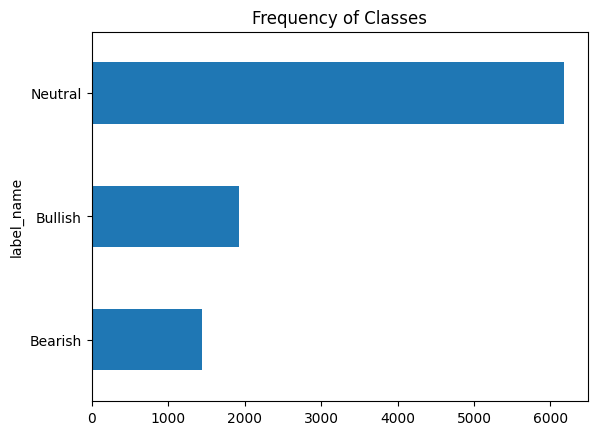

In [14]:
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

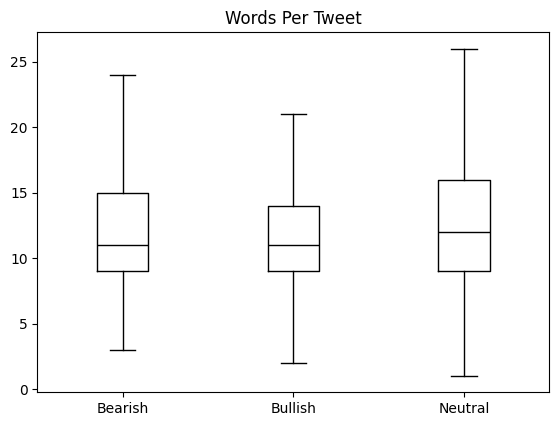

In [15]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False,
              showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [16]:
ds["train"].reset_format()

## Performing Parameter-Efficient Fine-Tuning

TODO: In the cells below, create a PEFT model from your loaded model, run a training loop, and save the PEFT model weights.

## Performing Inference with a PEFT Model

TODO: In the cells below, load the saved PEFT model weights and evaluate the performance of the trained PEFT model. Be sure to compare the results to the results from prior to fine-tuning.